### Can we find patterns among countries that are considered "developed"?

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('./countries.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


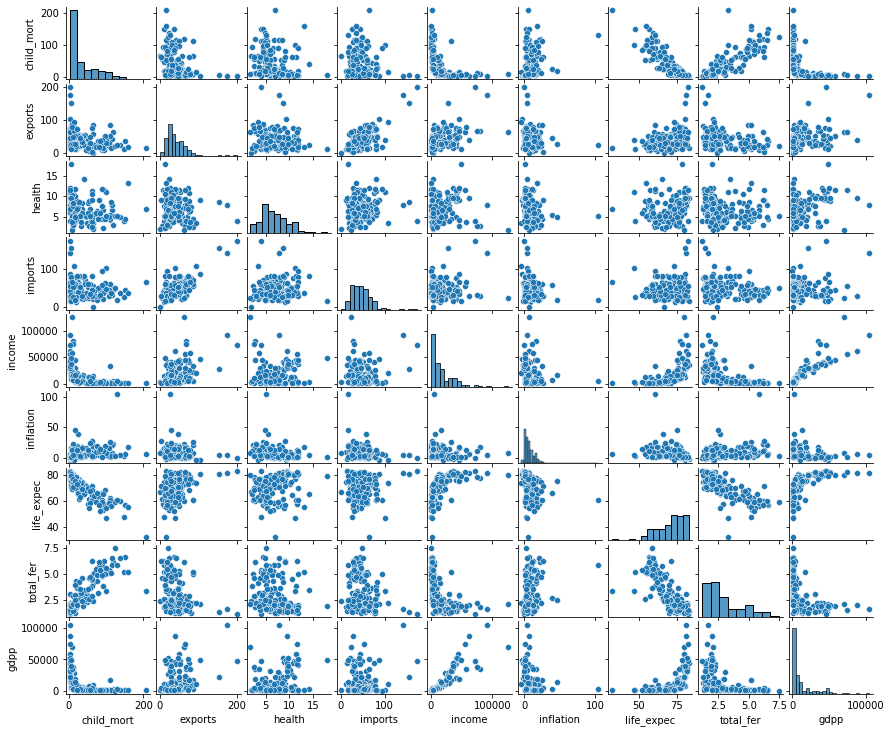

In [11]:
features = ['child_mort', 'exports', 'health','imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
feature_df = df[features]

g = sns.pairplot(feature_df)
g.fig.set_size_inches(12,10)

Features show high correlation with each other
- income + gdpp
- fertility + child mortality

In [14]:
feature_df.drop(columns=['gdpp', 'total_fer'], axis=1, inplace=True)
feature_df

c:\Users\anika\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,child_mort,exports,health,imports,income,inflation,life_expec
0,90.2,10.0,7.58,44.9,1610,9.44,56.2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3
2,27.3,38.4,4.17,31.4,12900,16.10,76.5
3,119.0,62.3,2.85,42.9,5900,22.40,60.1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8
...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4
164,23.3,72.0,6.84,80.2,4490,12.10,73.1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5


In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(feature_df), columns=feature_df.columns)
scaled_features

,child_mort,exports,health,imports,income,inflation,life_expec
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258
...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633


explain inertia

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
for num_clusters in range(2,20):
    model = KMeans(n_clusters = num_clusters, init='k-means++', random_state=23);
    model.fit(scaled_features);
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(scaled_features, model.labels_))

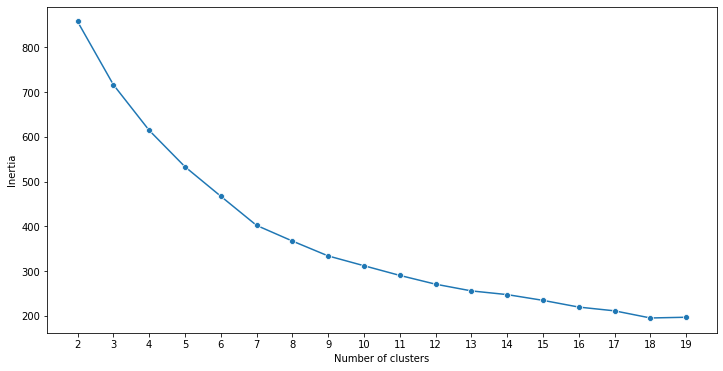

In [44]:
inert_df = pd.DataFrame({'Num_Clusters':range(2,20), 'Inertia':inertia})
plt.figure(figsize=(12,6))
sns.lineplot(data=inert_df, x="Num_Clusters", y="Inertia", marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.xticks([i for i in range(2,20)]);

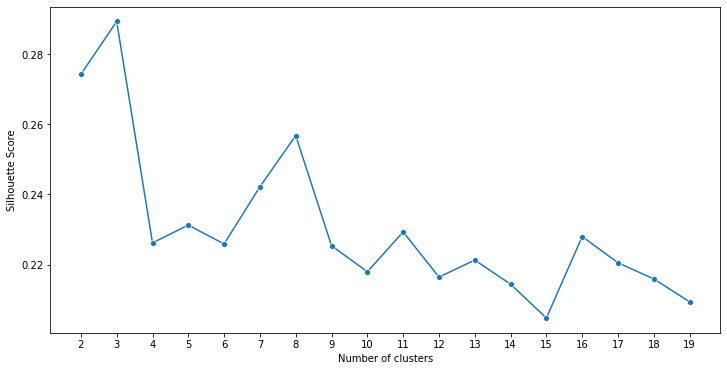

In [45]:
silh_df = pd.DataFrame({'Num_Clusters':range(2,20), 'Silhouette Score':silhouette})
plt.figure(figsize=(12,6))
sns.lineplot(data=silh_df, x="Num_Clusters", y="Silhouette Score", marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');
plt.xticks([i for i in range(2,20)]);


6 clusters

In [54]:
model = KMeans(n_clusters = 4, init='k-means++', random_state=23)
preds = model.fit_predict(scaled_features)
scaled_features['cluster'] = preds

<AxesSubplot:xlabel='imports', ylabel='life_expec'>

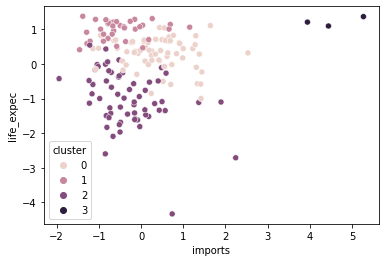

In [58]:
sns.scatterplot(x= 'imports', y='life_expec', hue='cluster', data=scaled_features)

In [56]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
reduced_df= pd.DataFrame(pca.fit_transform(scaled_features), columns=['pca1', 'pca2'])
reduced_df['cluster']= scaled_features['cluster']


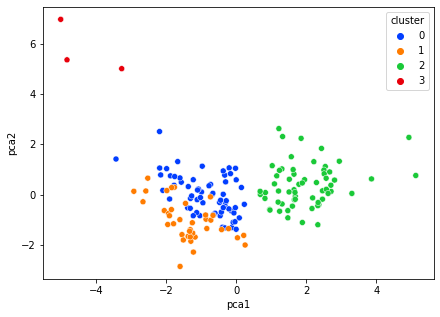

In [57]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=reduced_df, palette='bright')

In [ ]:
cluster_0= df_final_pca.loc[df_final_pca['cluster']==0]
cluster_0['Country'].unique()